PROBLEM STATEMENT:

---------
Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output
INPUTS:

Age: in months

Number: the number of vertebrae involved

Start: the number of the first (topmost) vertebra operated on.


OUTPUTS:

Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.

Link to the dataset: https://www.kaggle.com/abbasit/kyphosis-dataset


Source: John M. Chambers and Trevor J. Hastie eds. (1992) Statistical Models in S, Wadsworth and Brooks/Cole, Pacific Grove, CA.

--------

#importing data from drive

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
path ="/content/drive/MyDrive/kyphosis_project/kyphosis.csv"

In [130]:
#importing important libraries for analysis,statistical visualization and manupulation

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [132]:
df=pd.read_csv(path)

In [133]:
df.tail(6)

,Kyphosis,Age,Number,Start
75,absent,178,4,15
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [134]:
df.head(6)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16


#Descriptive statistics

In [135]:
#details of data
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


-------
As we kown Kyphosis present after surgery--

Age: in months

Number: the number of vertebrae involved

Start: the number of the first (topmost) vertebra operated on.

Conclusion: 1. Kyphosis seen as early as 1 month old.
2. Minimum 2 vertebras are operated .
3. Maximum 10 vertebras are operated .
4.  Mean age for 25 and 75 percentage age in months is 26 and 130 repectively.
5. Mean of vertebras involved for 25 and 75 percentage in numbers is 3 and 5 repectively.

------

In [136]:
# checking for data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [137]:
# it seems there are no null values

#visualizing data

In [138]:
#making copy of df, if needed afterwards
kf_df=df.copy()

In [139]:
#converting categorical column
from sklearn.preprocessing import LabelEncoder
#initializing Label encoder
le=LabelEncoder()
#converting categorical column into numerical
kf_df['Kyphosis'] = le.fit_transform(kf_df['Kyphosis'])

<Axes: xlabel='Kyphosis', ylabel='count'>

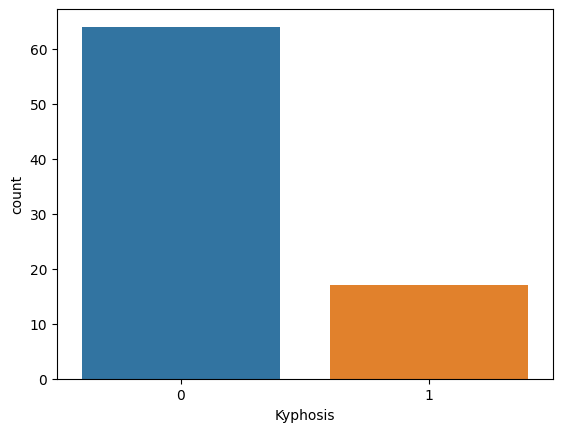

In [140]:
#checking the target column Kyphosis present after surgery
sns.countplot(data=kf_df,x='Kyphosis')


In [141]:
kf_df['Kyphosis'].value_counts()

0    64
1    17
Name: Kyphosis, dtype: int64

In [142]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [143]:
# "0" - Kyphosis absent after operation ,"1" -- Kyphosis pesent after operation

In [144]:
# Pateints where operation was sucessful.
kf_False=kf_df[kf_df['Kyphosis']==0]

In [145]:
# Pateints where operation was not sucessful.
kf_True=kf_df[kf_df['Kyphosis']==1]

<Axes: ylabel='Kyphosis'>

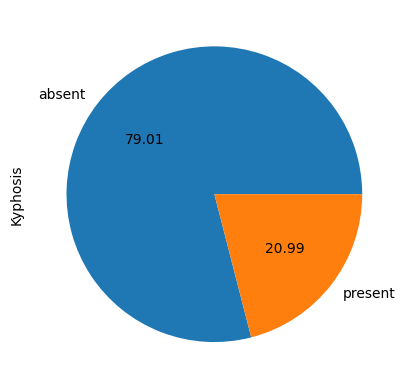

In [146]:
#percentage of 0 and 1
df['Kyphosis'].value_counts().plot(kind='pie',autopct='%.2f')

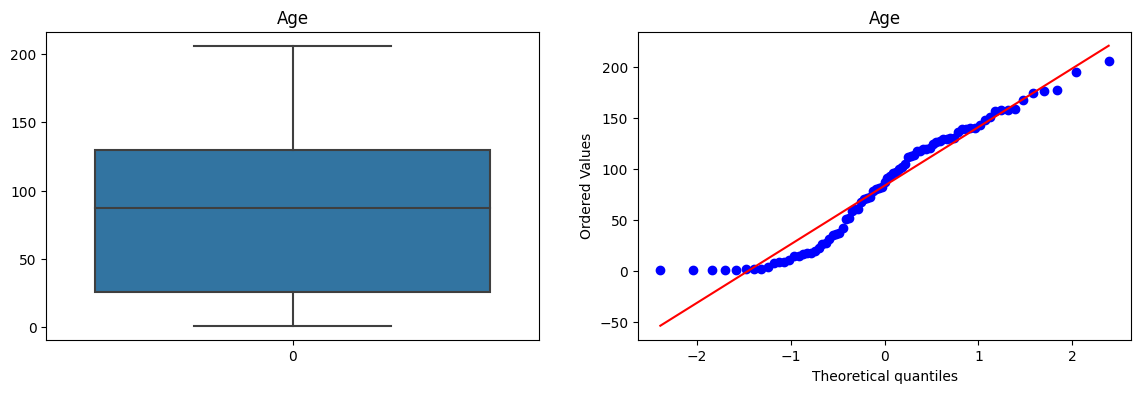

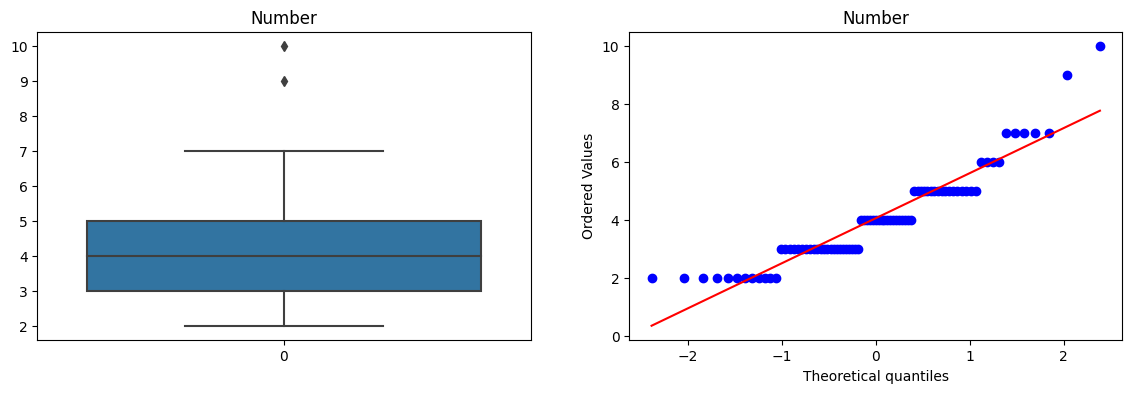

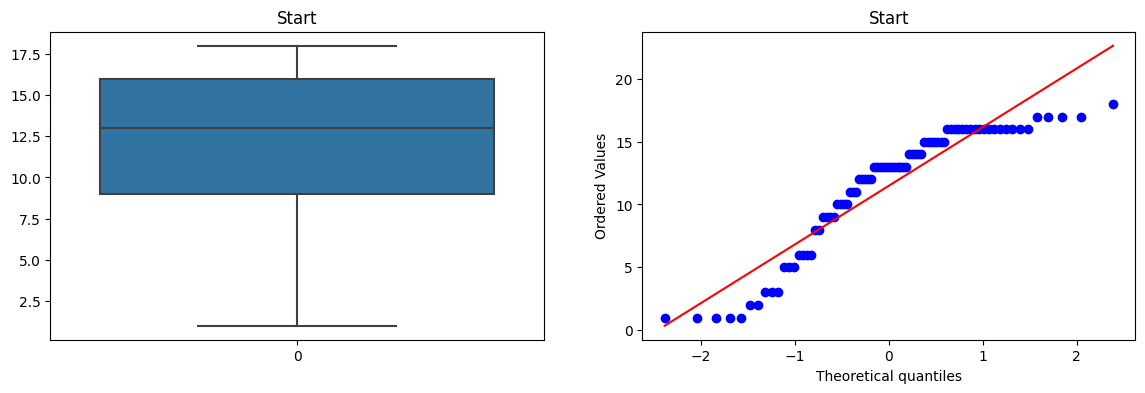

In [147]:
df_num = kf_df.drop('Kyphosis',axis=1)
for i in df_num.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.boxplot(df[str(i)])
  plt.title(i)

  plt.subplot(122)
  stats.probplot(df[str(i)],dist="norm", plot=plt)
  plt.title(i)
  plt.show()

<Axes: >

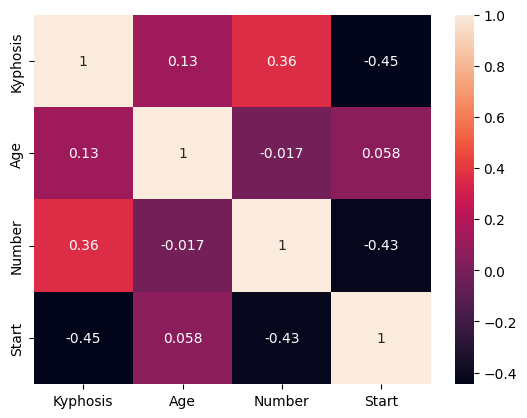

In [148]:
sns.heatmap(data=kf_df.corr(),annot=True)

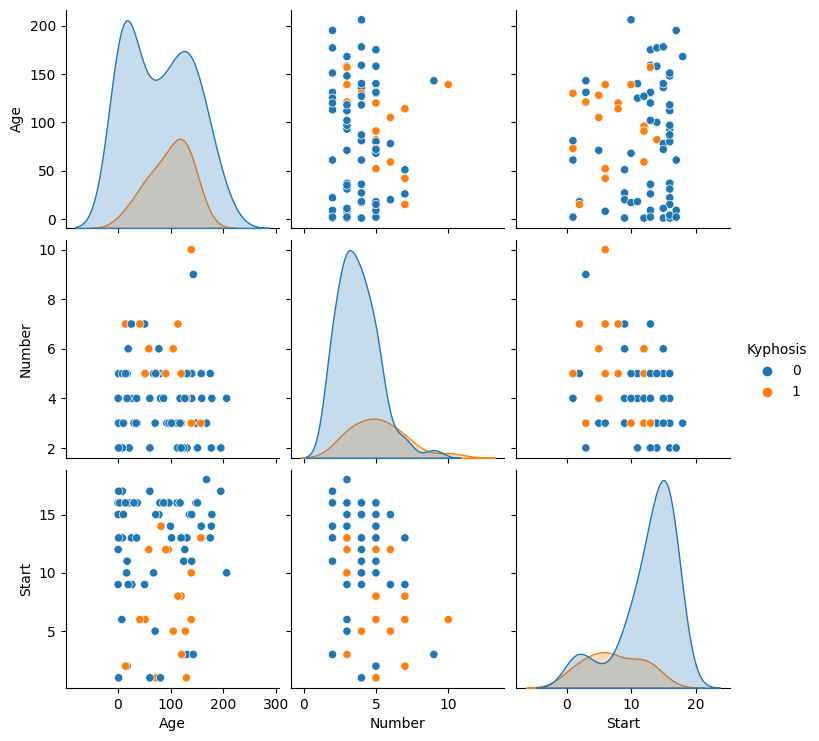

In [149]:
sns.pairplot(kf_df, hue = 'Kyphosis', vars = ['Age', 'Number', 'Start'])

#Handling imbalanced dataset

In [150]:
X = kf_df.drop('Kyphosis',axis=1)

In [151]:
y = kf_df['Kyphosis']

In [152]:
from imblearn.over_sampling import SMOTE

In [153]:
oversample= SMOTE()

In [154]:
X,y=oversample.fit_resample(X,y)

In [155]:
from collections import Counter
counter= Counter(y)

In [156]:
print(counter)

Counter({0: 64, 1: 64})


#Model Selection

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [159]:
X_train.shape

(89, 3)

In [160]:
y_train.shape

(89,)

In [161]:
X_test.shape

(39, 3)

In [162]:
y_test.shape

(39,)

In [163]:
pip install xgboost

In [164]:
import xgboost as xgb

In [165]:
from sklearn.pipeline import Pipeline

In [166]:
from sklearn.feature_selection import SelectKBest,RFE,f_classif

In [167]:
estimator = xgb.XGBClassifier(learning_rate=0.05, max_depth=3, n_estimators=2500, random_state=1234)
fs = SelectKBest(score_func=f_classif, k='all')
selector = RFE(estimator, n_features_to_select=3, step=1)

steps =[
    ('select',fs),
    ('clf',estimator)
]

pipeline = Pipeline(steps=steps)

In [168]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('select', SelectKBest(k='all')),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=2500, n_jobs=None,
                               num_parallel_tree=None, random_state=1234, ...))])

In [169]:
y_pred = pipeline.predict(X_test)

In [170]:
pred_df = pd.DataFrame(({'y':y_test,'y_pred':y_pred}))

In [171]:
pred_df

,y,y_pred
55,0,0
40,1,1
19,0,0
31,0,1
98,1,1
56,0,0
69,0,0
104,1,1
81,1,1
26,0,0


In [172]:
from sklearn.metrics import roc_auc_score

In [173]:
gini = 2*roc_auc_score(y_test,y_pred) - 1

In [174]:
print(gini)

0.7914438502673797


In [175]:
from sklearn.model_selection import RandomizedSearchCV

In [176]:
param_grid = {
    'clf__learning_rate':np.arange(0.05,1,0.05),
    'clf__max_depth':np.arange(3,10,1),
    'clf__n_estimators':np.arange(50,250,50),
}

rand_auc=RandomizedSearchCV(estimator=pipeline,param_distributions=param_grid,n_iter=5,scoring='roc_auc',cv=5,verbose=False)
rand_auc.fit(X_train,y_train)
rand_auc.best_score_

0.9281172839506173

In [177]:
y_pred = rand_auc.predict(X_test)
pred_df = pd.DataFrame({'y': y_test,'y_pred': y_pred})
gini = 2*roc_auc_score(y_test, y_pred)-1

In [178]:
print(gini)

0.7459893048128343


gini is lowered after tuning the model, hence calculated parameters value is good for the model.

In [179]:
# importing different classifiers
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier

In [180]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel='rbf',C=0.025,probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

In [181]:
for classifier in classifiers:
  steps = [
      ('select',fs),
      ('clf',classifier)
  ]
  pipeline=Pipeline(steps)
  pipeline.fit(X_train,y_train)
  print(classifier)
  print(pipeline)
  print(f"model score: {pipeline.score(X_test,y_test)}")

KNeighborsClassifier(n_neighbors=3)
Pipeline(steps=[('select', SelectKBest(k='all')),
                ('clf', KNeighborsClassifier(n_neighbors=3))])
model score: 0.8205128205128205
SVC(C=0.025, probability=True)
Pipeline(steps=[('select', SelectKBest(k='all')),
                ('clf', SVC(C=0.025, probability=True))])
model score: 0.4358974358974359
NuSVC(probability=True)
Pipeline(steps=[('select', SelectKBest(k='all')),
                ('clf', NuSVC(probability=True))])
model score: 0.8461538461538461
DecisionTreeClassifier()
Pipeline(steps=[('select', SelectKBest(k='all')),
                ('clf', DecisionTreeClassifier())])
model score: 0.8974358974358975
RandomForestClassifier()
Pipeline(steps=[('select', SelectKBest(k='all')),
                ('clf', RandomForestClassifier())])
model score: 0.9230769230769231
AdaBoostClassifier()
Pipeline(steps=[('select', SelectKBest(k='all')),
                ('clf', AdaBoostClassifier())])
model score: 0.8717948717948718
GradientBoostingClassi

#Random Forest model: as model score is 0.92

In [182]:
clf_rf=RandomForestClassifier()

In [183]:
clf_rf.fit(X_train,y_train)

RandomForestClassifier()

#Evaluating the model

In [184]:
from sklearn.metrics import classification_report, confusion_matrix

In [185]:
y_pred = rand_auc.predict(X_test)
pred_df = pd.DataFrame({'y': y_test,'y_pred': y_pred})
gini = 2*roc_auc_score(y_test, y_pred)-1

In [186]:
print(gini)

0.7459893048128343


In [187]:
#Random forest and Xgboost giving the same value for gini coefficient.

In [188]:
# confusion matrix
cm=confusion_matrix(y_test,y_pred)

<Axes: >

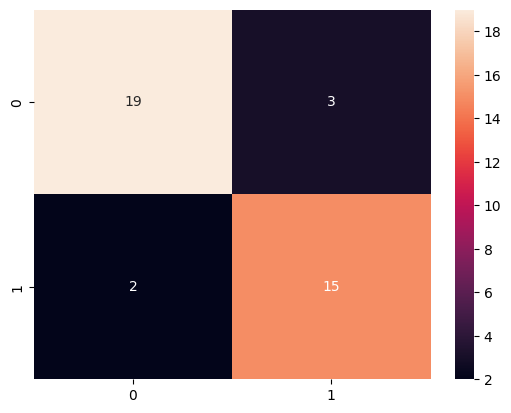

In [189]:
sns.heatmap(cm,annot=True)

In [190]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.83      0.88      0.86        17

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39

